# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
240831               2020-07-25           2020-07-23            2020-07-16   
240832               2020-07-25           2020-07-22            2020-07-21   
240833               2020-07-25           2020-07-22            2020-07-21   
240834               2020-07-25           2020-07-22            2020-07-21   
240835               2020-07-25           2020-07-22            2020-07-21   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
240831                      Asintomáti                   NaT   
240832                      Asintomáti                   NaT   
240833                      Asintomáti                   NaT   
240834             2020-07-17 00:00:00                   NaT   
240835                      Asintomáti                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento  \
Id de caso                                                            
1                         NaT          Bogotá d.c.      Bogotá D.C.   
2                         NaT  Guadalajara de buga  Valle del Cauca   
3                         NaT             Medellín        Antioquia   
4                         NaT             Medellín        Antioquia   
5                         NaT             Medellín        Antioquia   
...                       ...                  ...              ...   
240831                    NaT          Bogotá d.c.      Bogotá D.C.   
240832                    NaT          Bogotá d.c.      Bogotá D.C.   
240833                    NaT          Bogotá d.c.      Bogotá D.C.   
240834                    NaT          Bogotá d.c.      Bogotá D.C.   
240835                    NaT          Bogotá d.c.      Bogotá D.C.   

               Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                            ...                              
1                   Leve  Recuperado  ...               10 - 20    F   
2                   Leve  Recuperado  ...               30 - 40    M   
3                   Leve  Recuperado  ...               40 - 50    F   
4                   Leve  Recuperado  ...               50 - 60    M   
5                   Leve  Recuperado  ...               20 - 30    M   
...                  ...         ...  ...                   ...  ...   
240831      Asintomático        Casa  ...               50 - 60    F   
240832      Asintomático        Casa  ...               10 - 20    F   
240833      Asintomático        Casa  ...               30 - 40    M   
240834              Leve        Casa  ...               40 - 50    M   
240835      Asintomático        Casa  ...               20 - 30    M   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro              

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1052   1445
Antioquia                                           10068  12967
Arauca                                                 38    143
Archipiélago de San Andrés Providencia y Santa ...     10     23
Atlántico                                            9582  10903
Barranquilla D.E.                                   12485  14603
Bogotá D.C.                                         39713  41467
Bolívar                                               907   1121
Boyacá                                                378    381
Buenaventura D.E.                                     739   1259
Caldas                                                321    330
Caquetá                                               275    267
Cartagena D.T. y C.                                  6362   7896
Casanare                                               91    122
Cauca                                                 644    857
Cesar                                                1039   1408
Chocó                                                1297   1505
Cundinamarca                                         3421   3507
Córdoba                                              1775   1818
Guainía                                                 6      8
Guaviare                                                9     68
Huila                                                 338    335
La Guajira                                            853    904
Magdalena                                             908    970
Meta                                                  559   1697
Nariño                                               2996   3614
Norte de Santander                                    624    891
Putumayo                                              235    297
Quindío                                               131    114
Risaralda                                             689    609
Santa Marta D.T. y C.                                1470   1579
Santander                                            1006   1558
Sucre                                                2351   2768
Tolima                                                679   1370
Valle del Cauca                                      8737  10140
Vaupés                                                 27     34
Vichada                                                 1      1

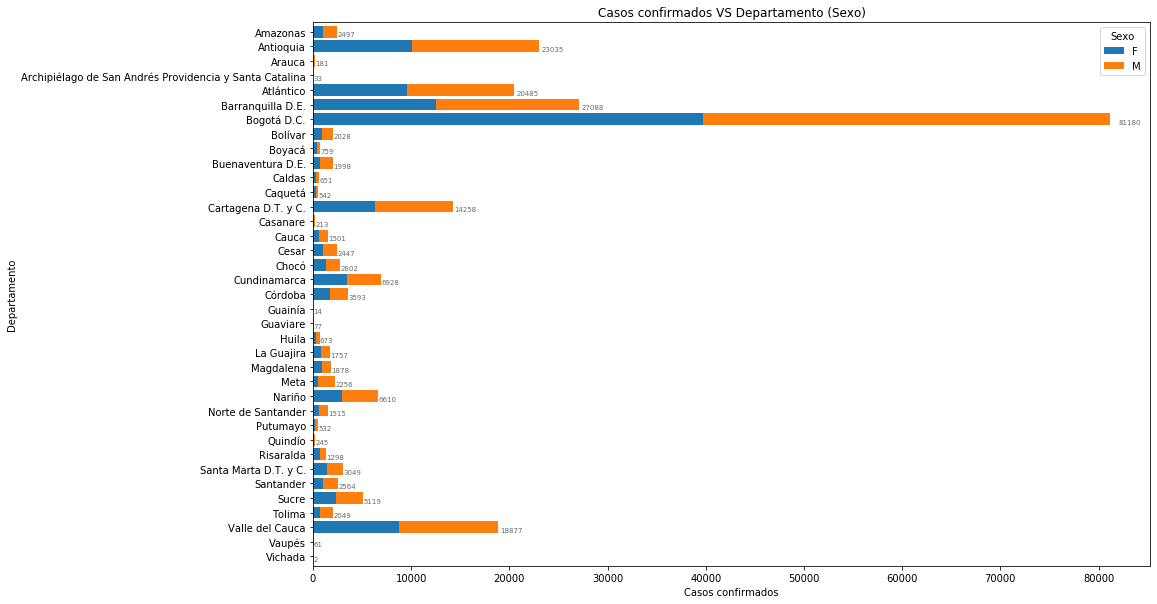

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      451      509   
Antioquia                                              802     1674     6149   
Arauca                                                   7       38       71   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              886     1517     4475   
Barranquilla D.E.                                     1033     1688     5942   
Bogotá D.C.                                           3602     6276    18589   
Bolívar                                                 93      190      447   
Boyacá                                                  46       67      160   
Buenaventura D.E.                                       42      276      459   
Caldas                                                  26       42      159   
Caquetá                                                 13       32      166   
Cartagena D.T. y C.                                    590     1015     3277   
Casanare                                                10        9       60   
Cauca                                                   68      132      364   
Cesar                                                  174      225      583   
Chocó                                                  121      240      648   
Cundinamarca                                           338      503     1586   
Córdoba                                                121      182      725   
Guainía                                                  0        2        4   
Guaviare                                                 1       29       16   
Huila                                                   41       65      131   
La Guajira                                              92      172      388   
Magdalena                                               97      136      343   
Meta                                                    38      186      716   
Nariño                                                 318      583     1541   
Norte de Santander                                      52       66      357   
Putumayo                                                11       35      159   
Quindío                                                  8       14       44   
Risaralda                                               83      116      292   
Santa Marta D.T. y C.                                  123      206      672   
Santander                                               91      208      645   
Sucre                                                  211      370     1057   
Tolima                                                  84      123      652   
Valle del Cauca                                        658     1315     4284   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                480      338      272   
Antioquia                                              5818     3594     2660   
Arauca                                                   43       12        6   
Archipiélago de San Andrés Providencia y Santa ...       11        7        3   
Atlántico                                              4809     3248     2665   
Barranquilla D.E.                                      6448     4245     3642   
Bogotá D.C.                                           17791    13054    10990   
Bolívar                                                 479      292      181   
Boyacá                                                  140      119 

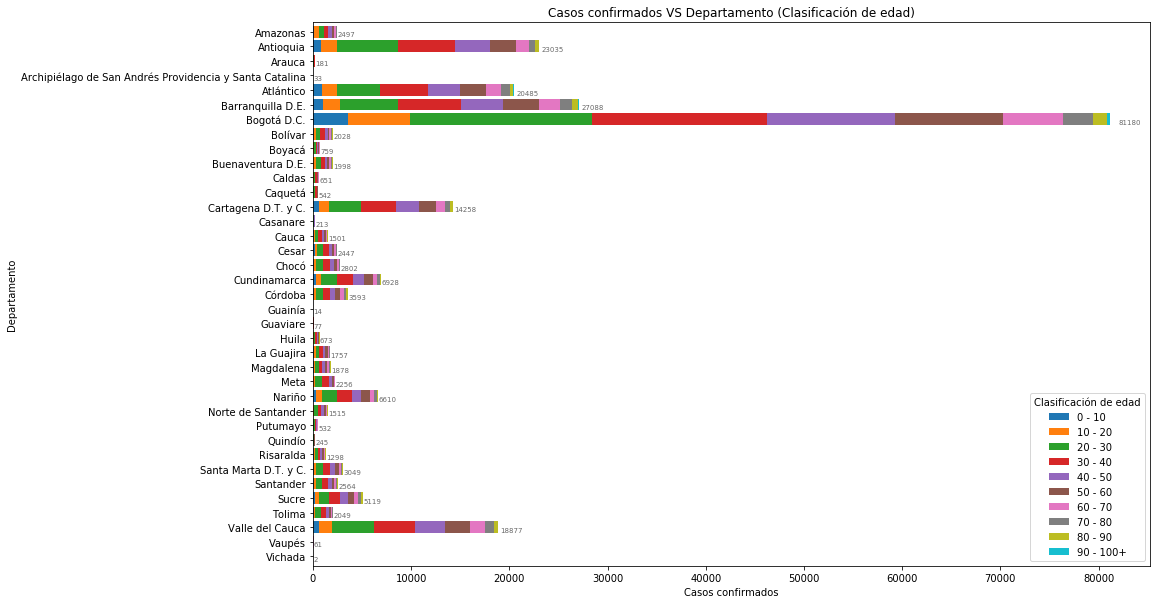

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               75.0      101.0   
Antioquia                                           15129.0      321.0   
Arauca                                                 50.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      5.0        0.0   
Atlántico                                            5415.0      961.0   
Barranquilla D.E.                                    6403.0     1399.0   
Bogotá D.C.                                         40170.0     2115.0   
Bolívar                                               659.0       93.0   
Boyacá                                                276.0       25.0   
Buenaventura D.E.                                     282.0      131.0   
Caldas                                                339.0        9.0   
Caquetá                                               409.0        8.0   
Cartagena D.T. y C.                                  3269.0      440.0   
Casanare                                               90.0        4.0   
Cauca                                                 719.0       44.0   
Cesar                                                 906.0       49.0   
Chocó                                                 695.0       89.0   
Cundinamarca                                         2839.0      161.0   
Córdoba                                              1621.0      438.0   
Guainía                                                 0.0        1.0   
Guaviare                                               31.0        0.0   
Huila                                                 258.0       18.0   
La Guajira                                            826.0      103.0   
Magdalena                                             580.0      181.0   
Meta                                                  699.0       27.0   
Nariño                                               2345.0      197.0   
Norte de Santander                                    929.0       59.0   
Putumayo                                              393.0       22.0   
Quindío                                                42.0        6.0   
Risaralda                                             587.0       25.0   
Santa Marta D.T. y C.                                1195.0      130.0   
Santander                                            1334.0       64.0   
Sucre                                                2229.0      327.0   
Tolima                                                717.0       38.0   
Valle del Cauca                                      6706.0      681.0   
Vaupés                                                 19.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                              988.0         155.0   
Arauca                                                   7.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              730.0         103.0   
Barranquilla D.E.                                      869.0         100.0   
Bogotá D.C.                                           4678.0         334.0   
Bolívar                                                115.0           8.0   
Boyacá                                                  52.0           6.0   
Buenaventura D.E.                                      119.0          26.0   
Caldas                                                  27.0           8.0   
Caquetá                                                 51.0           4.0   
Cartagena D.T. y C.  

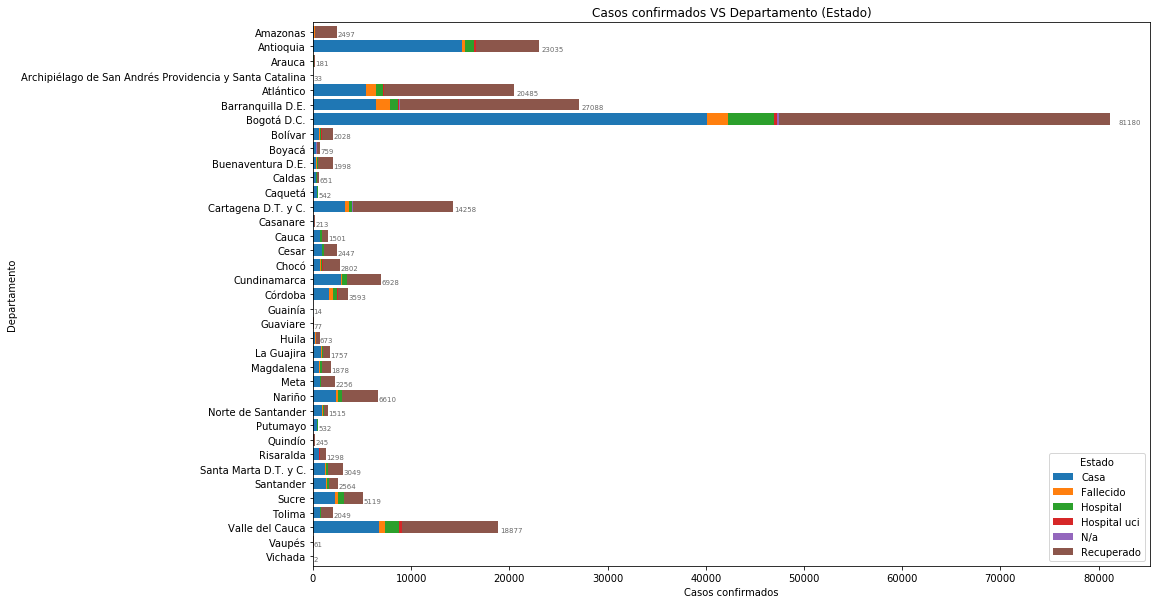

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          46625  51616
Fallecido      3030   5239
Hospital       5400   7213
Hospital uci    531    986
N/a             208    280
Recuperado    56022  63645

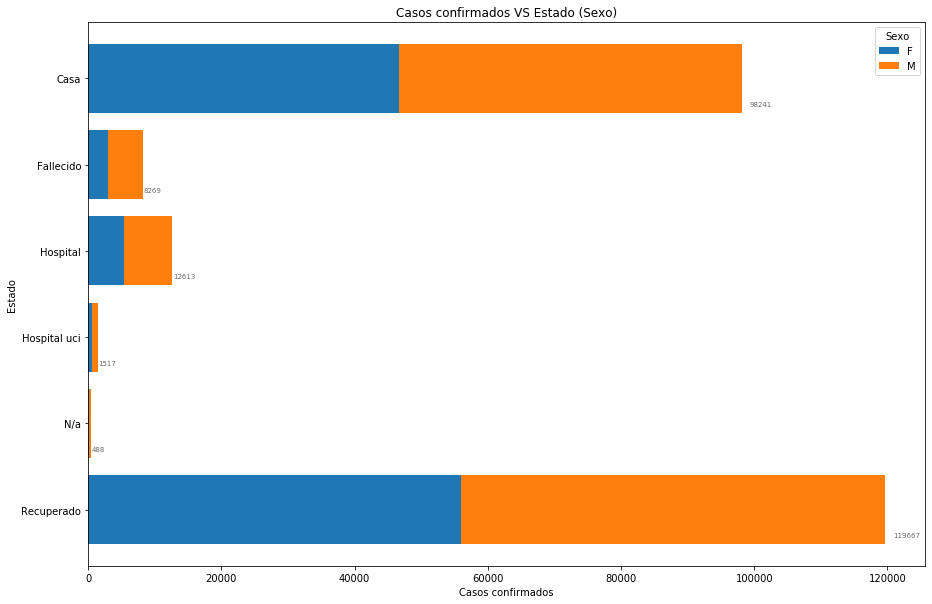

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3861     7469    24691    24531    16048    12089   
Fallecido                  14       17      119      291      670     1266   
Hospital                  486      282     1036     1622     1964     2625   
Hospital uci               59       26       54      159      218      367   
N/a                        14        9       22       20       39       57   
Recuperado               5583    10387    29776    28861    18791    14305   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5858     2490     1033        171  
Fallecido                 1937     2071     1529        355  
Hospital                  2304     1471      728         95  
Hospital uci               345      216       68          5  
N/a                         93      108       97         29  
Recuperado                7274     3238     1248        204

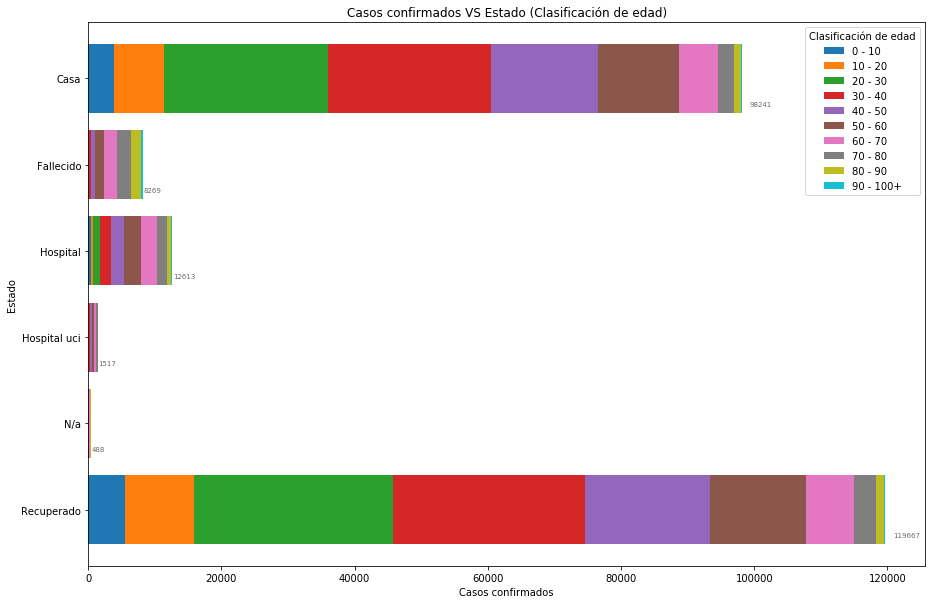

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   105609  115421
Importado       453     516
Relacionado    5754   13042

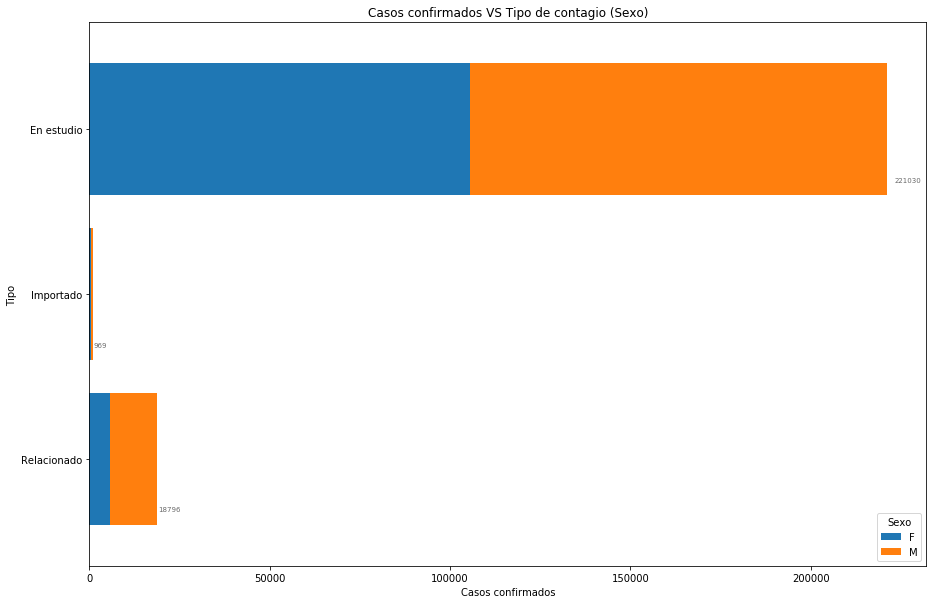

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               9164    15776    50249    50766    35119    28783   
Importado                   6       36      239      228      172      149   
Relacionado               847     2378     5210     4490     2439     1777   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               16822     9113     4441        797  
Importado                   94       35        9          1  
Relacionado                895      446      253         61

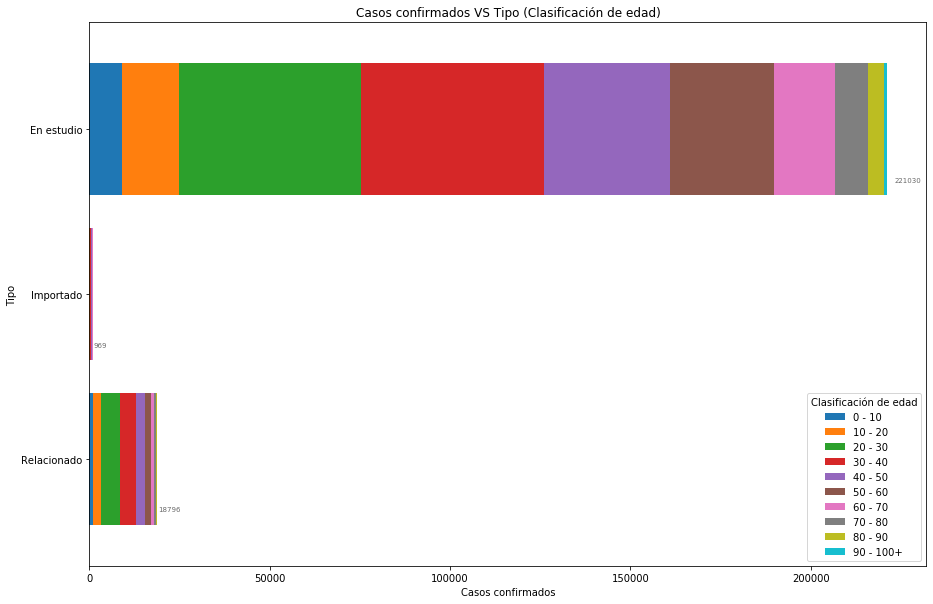

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4985   5032
10 - 20                 8333   9857
20 - 30                26245  29453
30 - 40                25281  30203
40 - 50                17559  20171
50 - 60                14105  16604
60 - 70                 8164   9647
70 - 80                 4339   5255
80 - 90                 2303   2400
90 - 100+                502    357

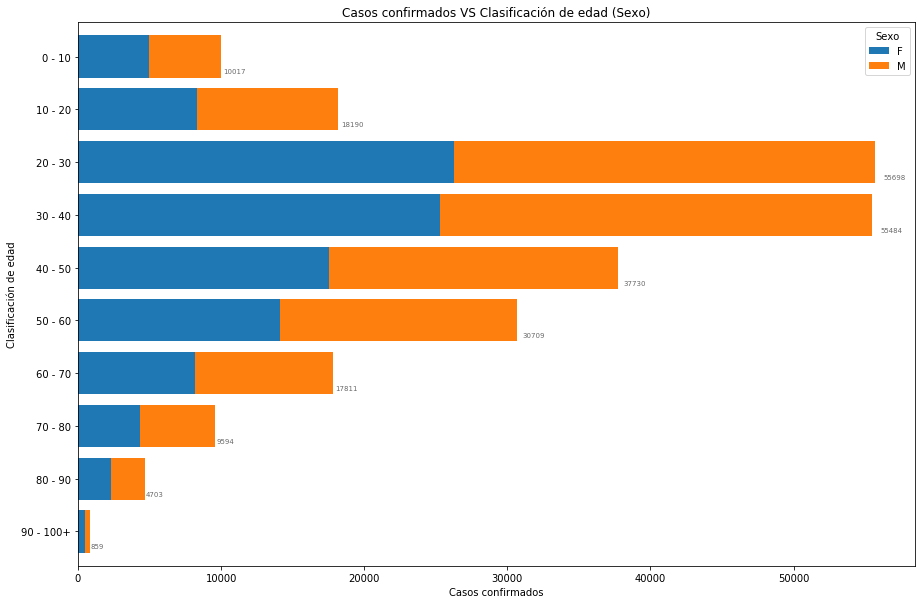

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3861         14       486            59   14   
10 - 20                 7469         17       282            26    9   
20 - 30                24691        119      1036            54   22   
30 - 40                24531        291      1622           159   20   
40 - 50                16048        670      1964           218   39   
50 - 60                12089       1266      2625           367   57   
60 - 70                 5858       1937      2304           345   93   
70 - 80                 2490       2071      1471           216  108   
80 - 90                 1033       1529       728            68   97   
90 - 100+                171        355        95             5   29   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       5583  
10 - 20                     10387  
20 - 30                     29776  
30 - 40                     28861  
40 - 50                     18791  
50 - 60                     14305  
60 - 70                      7274  
70 - 80                      3238  
80 - 90                      1248  
90 - 100+                     204

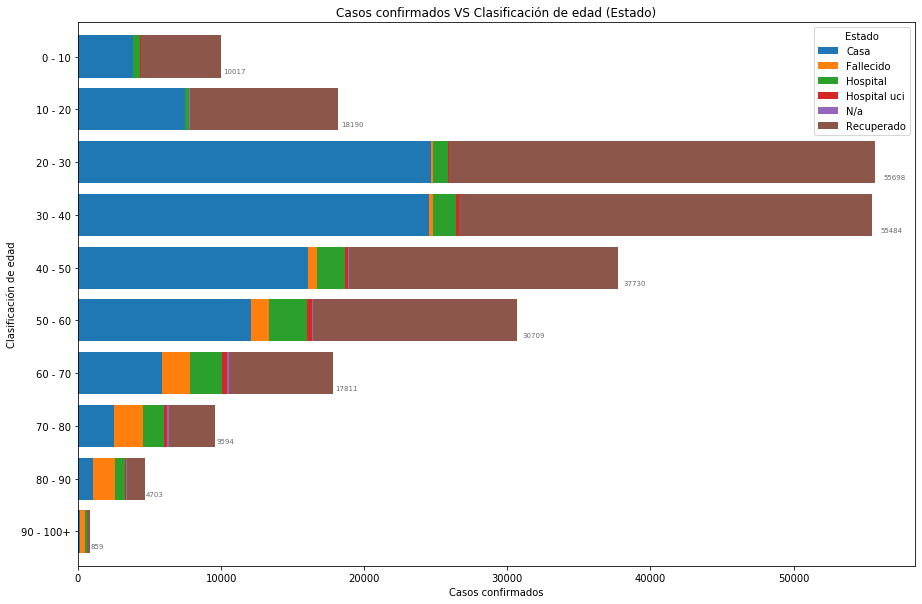

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-21            3717.0  4253.0
2020-07-22            4321.0  5302.0
2020-07-23            2579.0  2849.0
2020-07-24            2641.0  3011.0
2020-07-25             201.0   211.0

[139 rows x 2 columns]

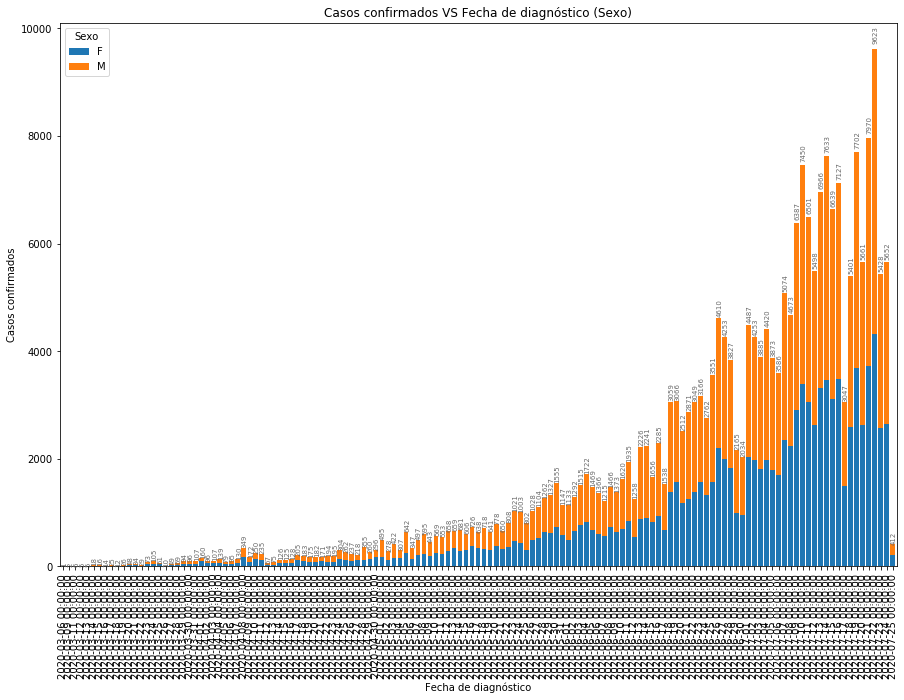

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-21                298      521     1927     1869     1311     1000   
2020-07-22                324      689     2281     2200     1506     1299   
2020-07-23                192      361     1190     1229      865      733   
2020-07-24                179      403     1299     1377      917      737   
2020-07-25                 12       35      109      110       78       31   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-21                 551      287      176         30  
2020-07-22                 727      382      182         33  
2020-07-23                 445      255      138         20  
2020-07-24                 401      237       92         10  
2020-07-25                  25        5        7          0  

[139 rows x 10 columns]

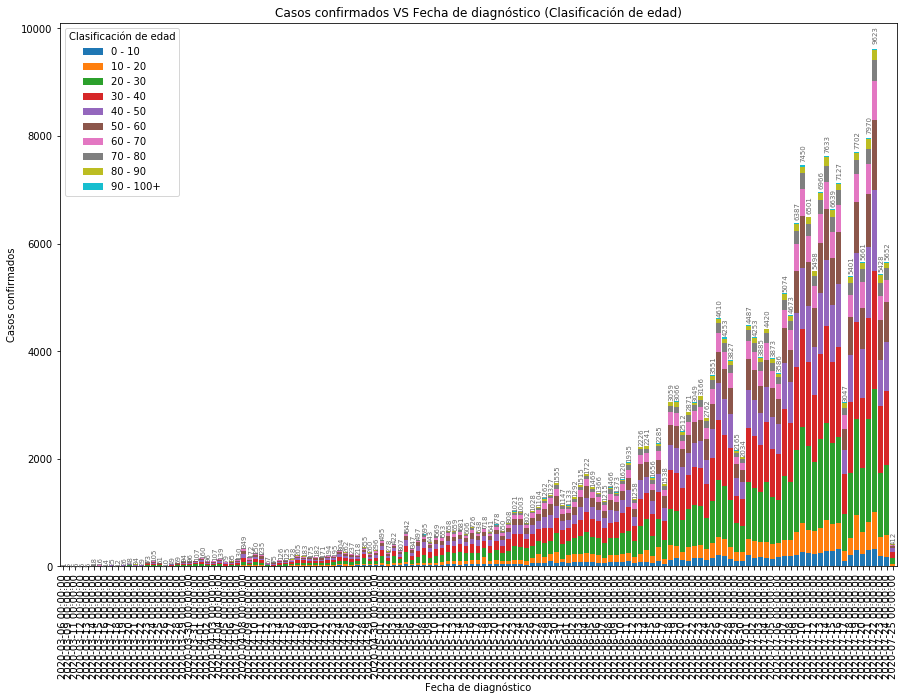

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                    
2020-03-06               0.0        0.0       0.0           0.0   0.0   
2020-03-09               0.0        0.0       0.0           0.0   0.0   
2020-03-11               0.0        0.0       0.0           0.0   0.0   
2020-03-12               0.0        0.0       0.0           0.0   0.0   
2020-03-13               0.0        0.0       0.0           0.0   0.0   
...                      ...        ...       ...           ...   ...   
2020-07-21            7340.0      144.0     424.0          49.0   5.0   
2020-07-22            8681.0      208.0     642.0          61.0  12.0   
2020-07-23            4761.0      123.0     500.0          38.0   6.0   
2020-07-24            5207.0        3.0     399.0          42.0   0.0   
2020-07-25             397.0        0.0      12.0           3.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-21                   8.0  
2020-07-22                  19.0  
2020-07-23                   0.0  
2020-07-24                   1.0  
2020-07-25                   0.0  

[139 rows x 6 columns]

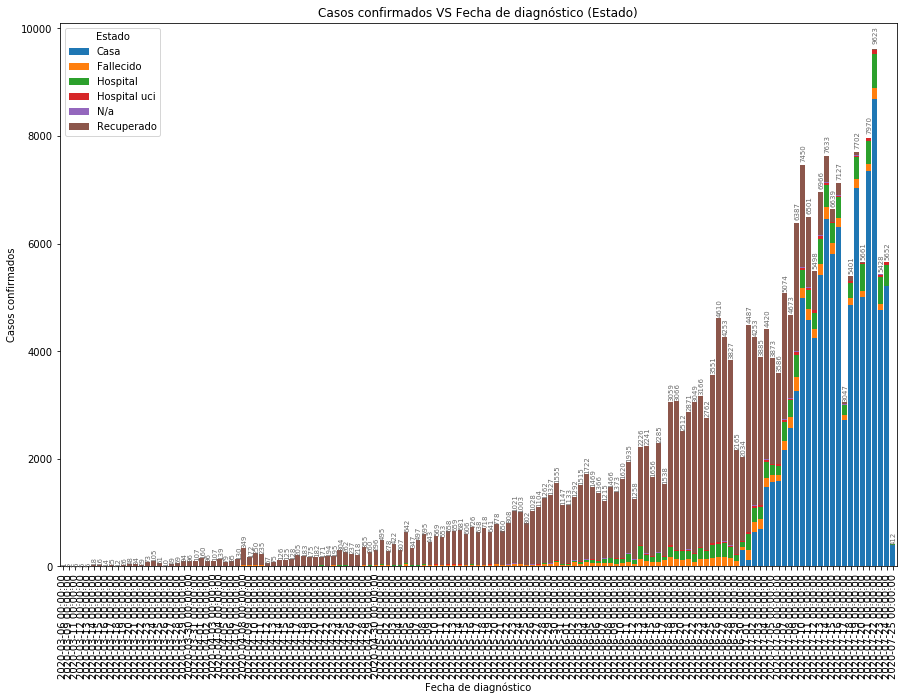

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-21            100295.0  115608.0
2020-07-22            104616.0  120910.0
2020-07-23            107195.0  123759.0
2020-07-24            109836.0  126770.0
2020-07-25            110037.0  126981.0

[139 rows x 2 columns]

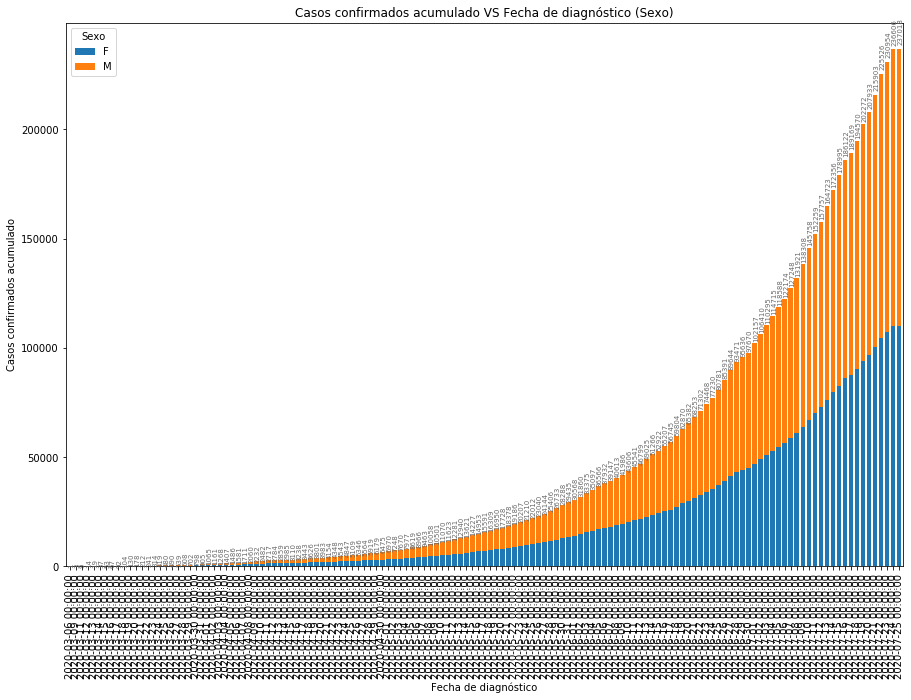

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-21               9177    16427    49917    49660    33809    27448   
2020-07-22               9501    17116    52198    51860    35315    28747   
2020-07-23               9693    17477    53388    53089    36180    29480   
2020-07-24               9872    17880    54687    54466    37097    30217   
2020-07-25               9884    17915    54796    54576    37175    30248   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-21               15922     8557     4200        786  
2020-07-22               16649     8939     4382        819  
2020-07-23               17094     9194     4520        839  
2020-07-24               17495     9431     4612        849  
2020-07-25               17520     9436     4619        849  

[139 rows x 10 columns]

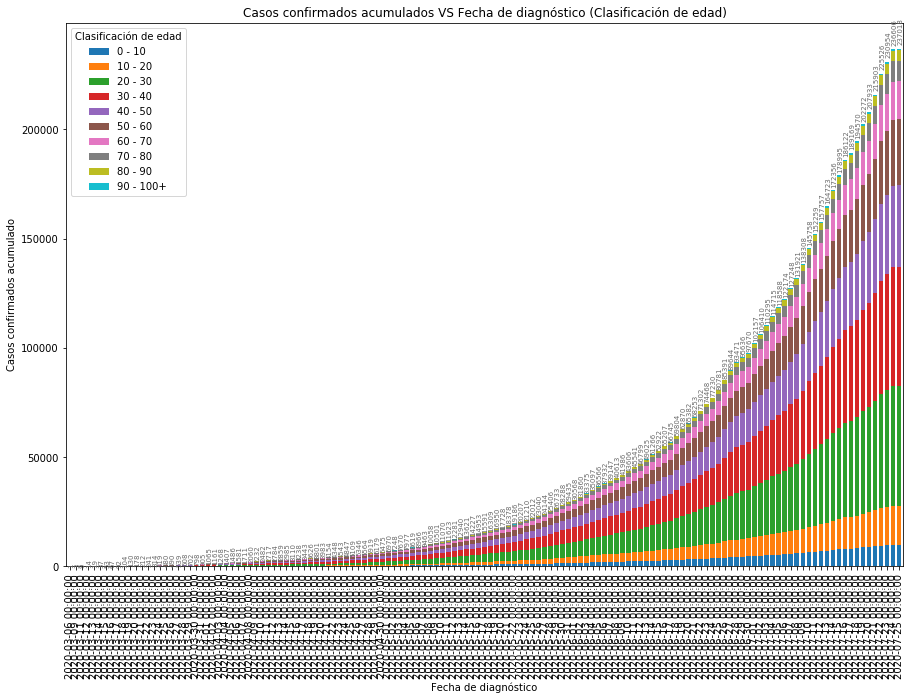

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-21            79141.0     7762.0   10911.0        1339.0  451.0   
2020-07-22            87822.0     7970.0   11553.0        1400.0  463.0   
2020-07-23            92583.0     8093.0   12053.0        1438.0  469.0   
2020-07-24            97790.0     8096.0   12452.0        1480.0  469.0   
2020-07-25            98187.0     8096.0   12464.0        1483.0  469.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-21              116299.0  
2020-07-22              116318.0  
2020-07-23              116318.0  
2020-07-24              116319.0  
2020-07-25              116319.0  

[139 rows x 6 columns]

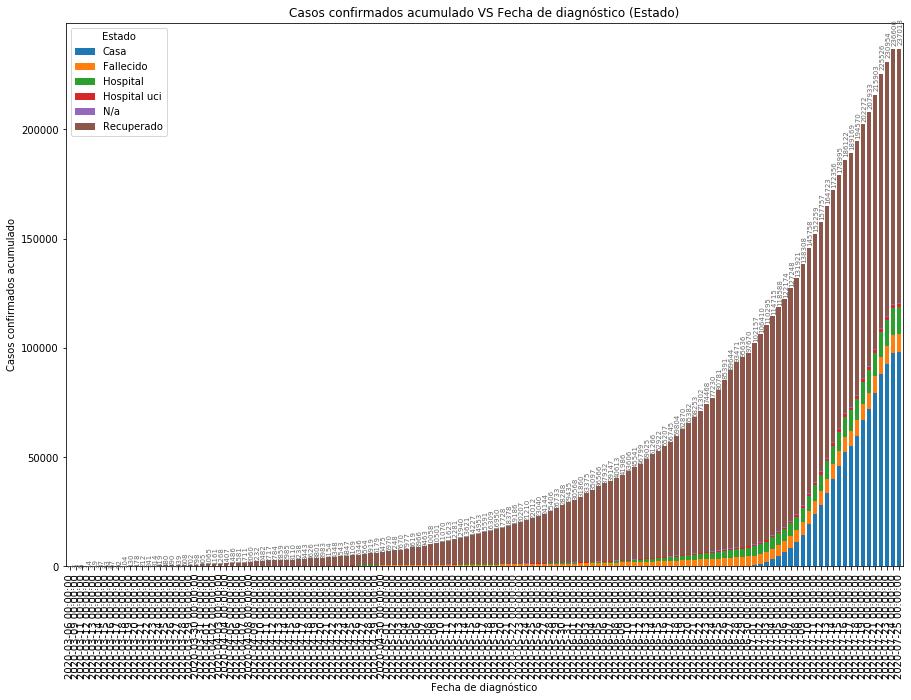

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>